## Requisição API usando Pandas

Documentação: https://brapi.dev/docs/acoes/list#search-opcional

## 1- Imports

In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2- Consumindo dados da API

In [ ]:
url = 'https://brapi.dev/api/quote/list?'

params = {
    'token': '9jn91uehisPg1z8UmRKv3J',
    'sortBy': 'volume',
    'sortOrder': 'desc'
}
response = requests.get(url, params=params)
data = response.json()['stocks']

df = pd.DataFrame(data)

## 3- Limpando e preparando dados

In [ ]:
df.info()          # Visualização geral dos dados contidos no DF
df.isnull().sum()  # Verificação de quais colunas contem dados que estão nulos e a quantidade

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stock       1714 non-null   object 
 1   name        1714 non-null   object 
 2   close       1714 non-null   float64
 3   change      1714 non-null   float64
 4   volume      1714 non-null   int64  
 5   market_cap  1166 non-null   float64
 6   logo        1714 non-null   object 
 7   sector      1299 non-null   object 
 8   type        1714 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 120.6+ KB
Out[21]: stock           0
name            0
close           0
change          0
volume          0
market_cap    548
logo            0
sector        415
type            0
dtype: int64

In [ ]:
df.describe()

,close,change,volume,market_cap
count,1714.000000,1714.000000,1.714000e+03,1.166000e+03
mean,66.924615,0.488254,8.997063e+05,2.010620e+11
std,138.973161,3.623747,7.037336e+06,8.870762e+11
min,0.180000,-30.730769,1.000000e+00,2.813440e+06
25%,9.632500,-0.364775,1.825000e+02,1.161030e+09
50%,27.335000,0.339684,3.147500e+03,8.518401e+09
75%,75.635000,1.486924,2.985650e+04,1.014111e+11
max,1937.000000,89.611655,2.303698e+08,1.492775e+13


Aqui é possivel veriricar os seguintes pontos:
- Na coluna **Close** há um salto gigantesco do percentil 75% até o máximo, o que indica uma concentração de valores em uma faixa especifica. Pode ser interessante tratar esta coluna para obter uma melhor visualização dependendo da análise a ser realizada.

- Seguindo nessa mesma linha, as colunas **Volume** e **Market_cap** também possuem variações extremas entre percentis, sendo agravado também por estas colunas possuírem uma grande amplitude entre o valor máximo e mínimo. Para se tornar mais visual, colocarei em um gráfico a disposição dos valores nestas 3 colunas.

- Na coluna Change é possivel ver qual foi o percentual do papel que mais caiu no dia e do que mais subiu. Também atravéz dos percentis é possivel já ter uma noção de onde há maior concentração de valores, informação que ajuda a entender se o mercado está em uma tendencia de alta ou de queda.

### 3.1- Coluna Change

In [ ]:
df[df['change'].isnull()]           # Vizualizando as linhas com valores nulos da coluna 'Change'
df = df.dropna(subset=['change'])   # Removi apenas os nulos da coluna 'Change'

### 3.2- Coluna Type

In [ ]:
# Verificando quais valores a coluna type tem
df['type'].unique()

# Gerando dicionário com os valores verificados acima e as respectivas traduções
dict_type = {'stock': 'acao', 'fund': 'fundo', 'bdr': 'bdr'}

# Sobrescrevendo o DF com os valores do dicionário
df['type'] = df['type'].map(dict_type)

### 3.3- Coluna Sector

In [ ]:
# Rodei essa linha com os 3 tipos de papeis, e como a coluna 'sector' será importante apenas para 'Acoes' e nessa configuração não possui valores Nulos, decidi não tratá-los
df[df['sector'].isnull() & (df['type'] == 'Acao')]

# Fiz o mesmo tratamento da coluna Type
df['sector'].unique()

dict_sector = {
    'Retail Trade': 'Comércio Varejista', 'Health Services': 'Serviços de Saúde', 'Finance': 'Finanças', 'Non-Energy Minerals': 'Minerais Não Energéticos', 'Energy Minerals': 'Minerais Energéticos', 'Consumer Non-Durables': 'Bens de Consumo Não Duráveis', 'Technology Services': 'Serviços de Tecnologia', 'Commercial Services': 'Serviços Comerciais', 'Utilities': 'Serviços Públicos',
    'Transportation': 'Transporte', 'Consumer Services': 'Serviços ao Consumidor', 'Process Industries': 'Indústrias de Processo', 'Miscellaneous': 'Diversos', 'Distribution Services': 'Serviços de Distribuição', 'Producer Manufacturing': 'Manufatura de Produtores', 'Electronic Technology': 'Tecnologia Eletrônica', 'Health Technology': 'Tecnologia de Saúde', 'Communications': 'Comunicações', 'Industrial Services': 'Serviços Industriais', 'Consumer Durables': 'Bens de Consumo Duráveis'
}

df['sector'] = df['sector'].map(dict_sector)

### 3.4- Coluna Stock

In [ ]:
# Remoção dos papeis fracionados da análise
df = df[(~df['stock'].str.endswith('F'))]

## 4- Gerando graficos

**1- Quantos papeis tem por cada setor e tipo de papel? (Ação, BDR, Fundo)**

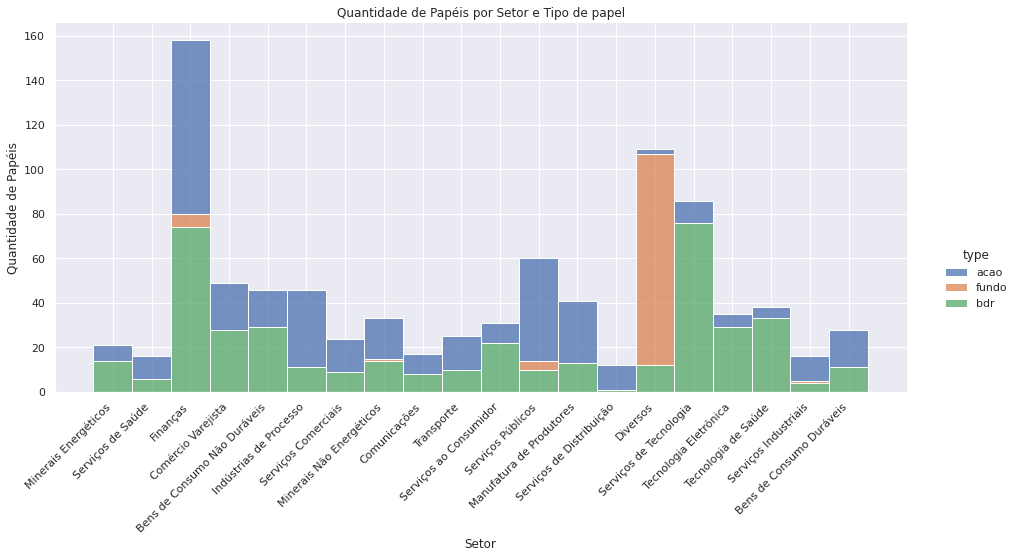

In [ ]:
sns.displot(df, x="sector", hue='type', aspect=2.2, height=6 ,multiple="stack")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Setor')
plt.ylabel('Quantidade de Papéis')
plt.title('Quantidade de Papéis por Setor e Tipo de papel')
plt.show()

**2- Qual a distribuição dos papeis por tipo e seus respectivos volumes?**

Aqui é possível observar que os 3 tipos de papeis tem uma quantidade razoavelmente próxima de papeis disponíveis no mercado, porém, quando se trata de volume negociado as ações se destacam totalmente, sendo os papeis mais negociados da bolsa.

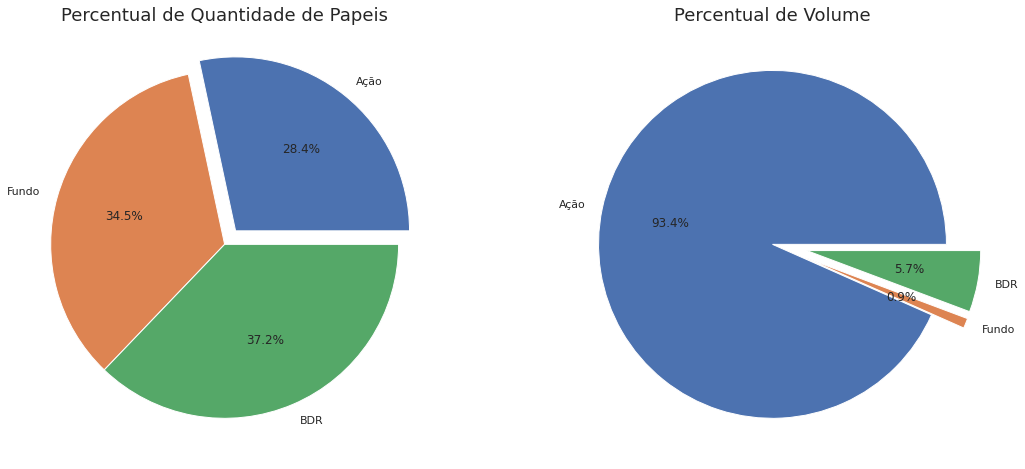

In [ ]:
df_group = df.groupby('type')['volume'].sum()
labels = ['Ação', 'Fundo', 'BDR']
sizes = [len(df[df['type'] == 'acao']), len(df[df['type'] == 'fundo']), len(df[df['type'] == 'bdr'])]

fig, axes = plt.subplots(1, 2, figsize=(18,8))
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0, 0))
axes[0].set_title('Percentual de Quantidade de Papeis', fontsize=18)

axes[1].pie(df_group, labels=labels, autopct='%1.1f%%', explode=(0, 0.2, 0.2))
axes[1].set_title('Percentual de Volume', fontsize=18)
plt.show()

**3- Qual a variação percentual dos papéis por tipo?**


- Aqui é possivel verificar os '_outliers_' de variação percentual para cada tipo de papel. Para garantir uma boa vizualização, fixei o range de visualização para 40 pontos percentuais **(de -20% a 20%)**, para papéis que utrapassem esse valor percentual será realizado outras análises abaixo.

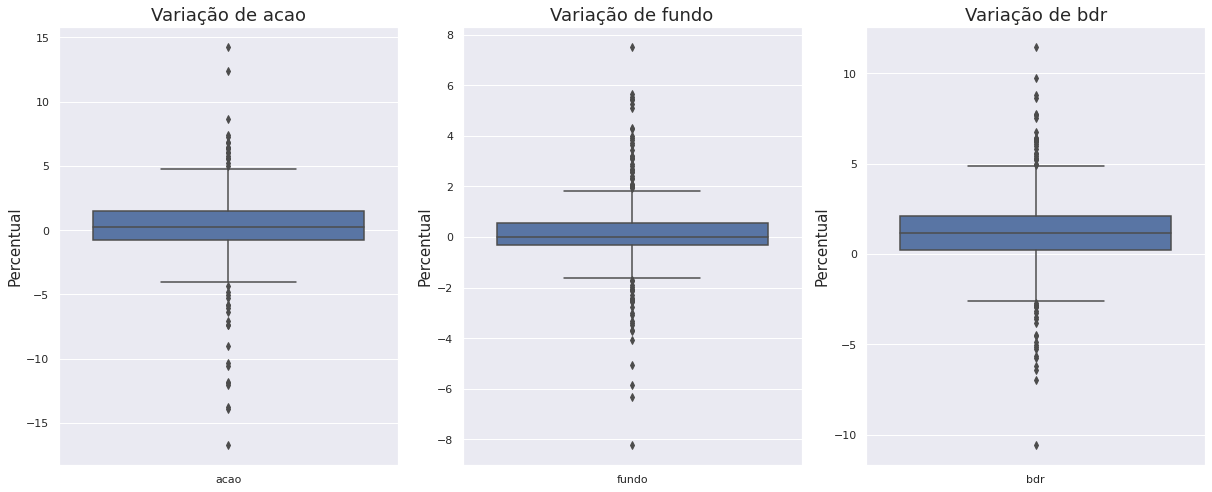

In [ ]:
types = df['type'].unique()
df_clean = df[(df['change'] <= 20) & (df['change'] >= -20)]

fig, axes = plt.subplots(1, len(types), figsize=(17,7))

for i, t in enumerate(types):
    sns.boxplot(data=df_clean[df_clean['type'] == t], x='type', y='change', ax=axes[i])
    axes[i].set_title(f'Variação de {t}', fontsize=18)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percentual', fontsize=15)

# Ajustar o layout
plt.tight_layout()
plt.show()

**4- Qual a média de negociação dentro de cada setor?**

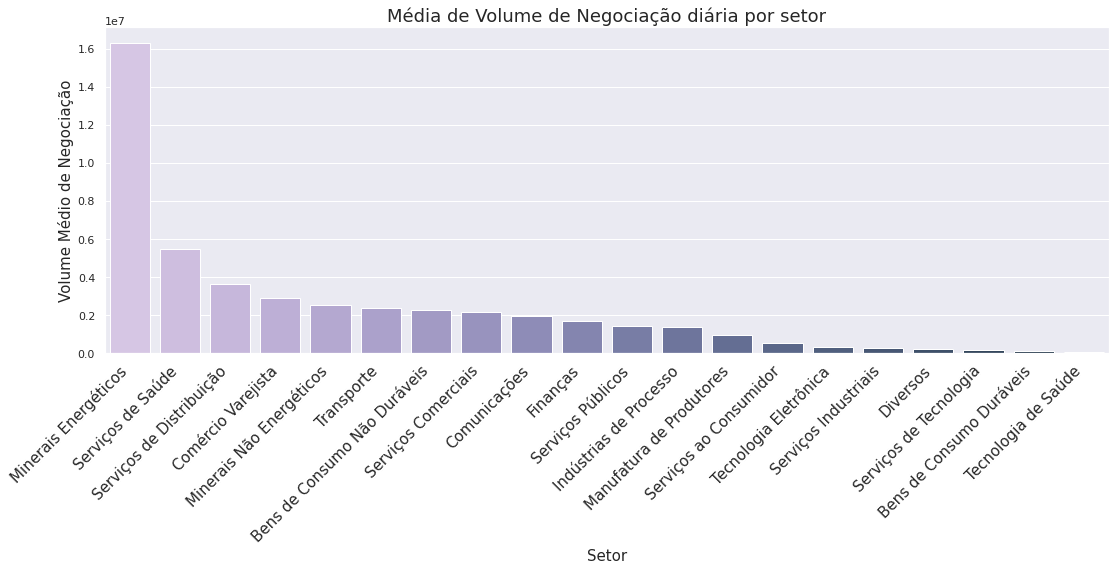

In [ ]:
df_clean = df.groupby('sector')['volume'].mean().reset_index()
order = df_clean.sort_values('volume', ascending=False)['sector']

plt.figure(figsize=(18, 6))

palette = sns.cubehelix_palette(start=-.5, rot=.3, light=.8, dark=.2, as_cmap=False, n_colors=20)
sns.barplot(data=df_clean, x='sector', y='volume', order=order, palette=palette)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.xlabel('Setor', fontsize=15)
plt.ylabel('Volume Médio de Negociação', fontsize=15)
plt.title('Média de Volume de Negociação diária por setor', fontsize=18)
plt.show()

**5- Qual a disposição dos dados das colunas 'volume', 'close' e 'market_cap'?**

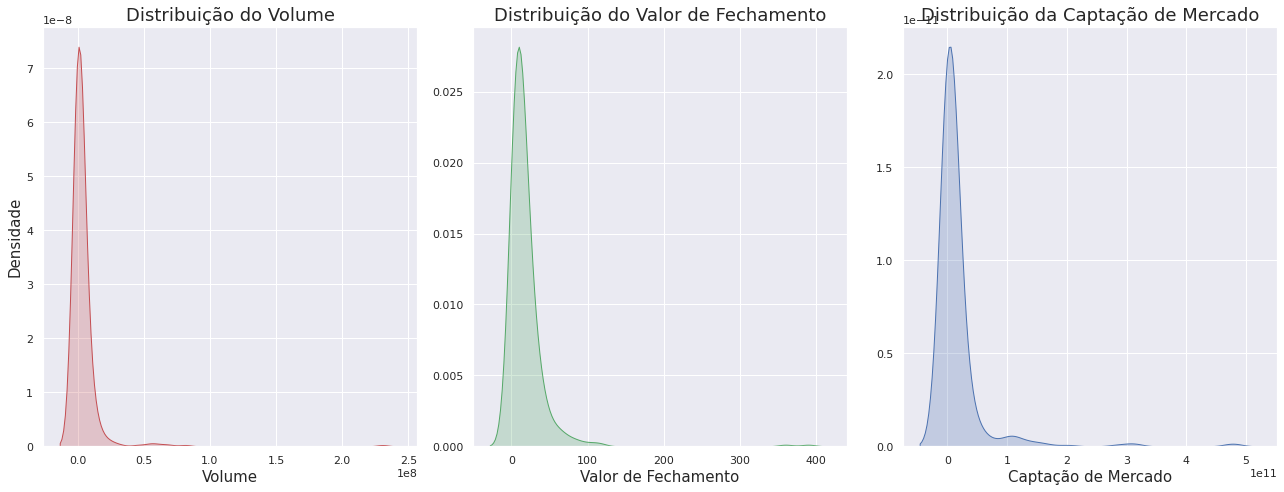

In [ ]:
df_clean = df[(df['type'] == 'acao')]

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

sns.kdeplot(data=df_clean['volume'], shade=True, color='r', ax=axes[0])
axes[0].set_title('Distribuição do Volume', fontsize=18)
axes[0].set_xlabel('Volume', fontsize=15)
axes[0].set_ylabel('Densidade', fontsize=15)

sns.kdeplot(data=df_clean['close'], shade=True, color='g', ax=axes[1])
axes[1].set_title('Distribuição do Valor de Fechamento', fontsize=18)
axes[1].set_xlabel('Valor de Fechamento', fontsize=15)
axes[1].set_ylabel('')

sns.kdeplot(data=df_clean['market_cap'], shade=True, color='b', ax=axes[2])
axes[2].set_title('Distribuição da Captação de Mercado', fontsize=18)
axes[2].set_xlabel('Captação de Mercado', fontsize=15)
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()